In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
import semseglib

Using TensorFlow backend.
c:\anacondas\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anacondas\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anacondas\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anacondas\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
model = semseglib.models.unet((256,256,3), 4, 16, block_type="residual_zeropad", batchnorm=True, downsampling="conv1x1", classes=2)

Instructions for updating:
Colocations handled automatically by placer.


In [47]:
X = np.random.normal(loc=0.5, scale=0.1, size=(10,256,256,3))
y = np.zeros((10,256,256,3))

for i in range(10):
    width_v = np.random.choice(np.arange(100))
    start_v = np.random.choice(np.arange(256 - width_v))
    channel_v = np.random.choice(np.arange(3))
    
    X[i, :, start_v:start_v+width_v, channel_v] = 0
    y[i, :, start_v:start_v+width_v, 0] = 1
    
    width_h = np.random.choice(np.arange(100))
    start_h = np.random.choice(np.arange(256 - width_h))
    channel_h = np.random.choice(np.arange(3))
    
    # Prevent overlap
    X[i, start_h:start_h+width_h, :start_v, channel_h] = 0
    y[i, start_h:start_h+width_h, :start_v, 1] = 1
    X[i, start_h:start_h+width_h, start_v+width_v:, channel_h] = 0
    y[i, start_h:start_h+width_h, start_v+width_v:, 1] = 1
    
    y[i, :, :, 2] = np.all(X[i, :, :], axis=-1)

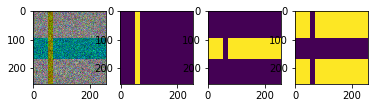

In [48]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(X[0])
ax[1].imshow(y[0, :, :, 0].reshape((256,256)))
ax[2].imshow(y[0, :, :, 1].reshape((256,256)))
ax[3].imshow(y[0, :, :, 2].reshape((256,256)))

In [49]:
model.compile(Adam(), loss=semseglib.losses.generalized_dice_loss, metrics=[semseglib.losses.generalized_dice_coeff])

In [35]:
model.fit(X, y, batch_size=4, epochs=5)

Epoch 1/5
10/10 [==============================] - 49s 5s/step - loss: 0.4799 - generalized_dice_coeff: 0.5201
Epoch 2/5
10/10 [==============================] - 43s 4s/step - loss: 0.1079 - generalized_dice_coeff: 0.8921
Epoch 3/5
10/10 [==============================] - 43s 4s/step - loss: 0.0764 - generalized_dice_coeff: 0.9236
Epoch 4/5
10/10 [==============================] - 43s 4s/step - loss: 0.0775 - generalized_dice_coeff: 0.9225
Epoch 5/5
10/10 [==============================] - 43s 4s/step - loss: 0.0626 - generalized_dice_coeff: 0.9374


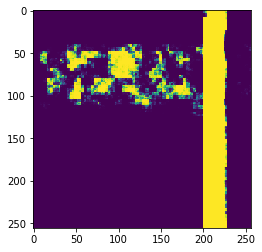

In [43]:
plt.imshow(model.predict(np.array([X[1],]))[0, :, :, 0].reshape((256,256)))

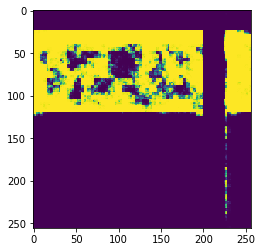

In [46]:
plt.imshow(model.predict(np.array([X[1],]))[0, :, :, 1].reshape((256,256)))